In [1]:
#%matplotlib notebook

In [2]:
!pip install specreduce --quiet

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
import specreduce
import pandas as pd

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy.

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this:

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too)

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics.

Keep this plot handy. You should be able to intuitively convert between these values in your head.

In [4]:
import matplotlib as mpl
from matplotlib.colors import BoundaryNorm, ListedColormap

Text(0.5, 0, 'Conventional SI Units')

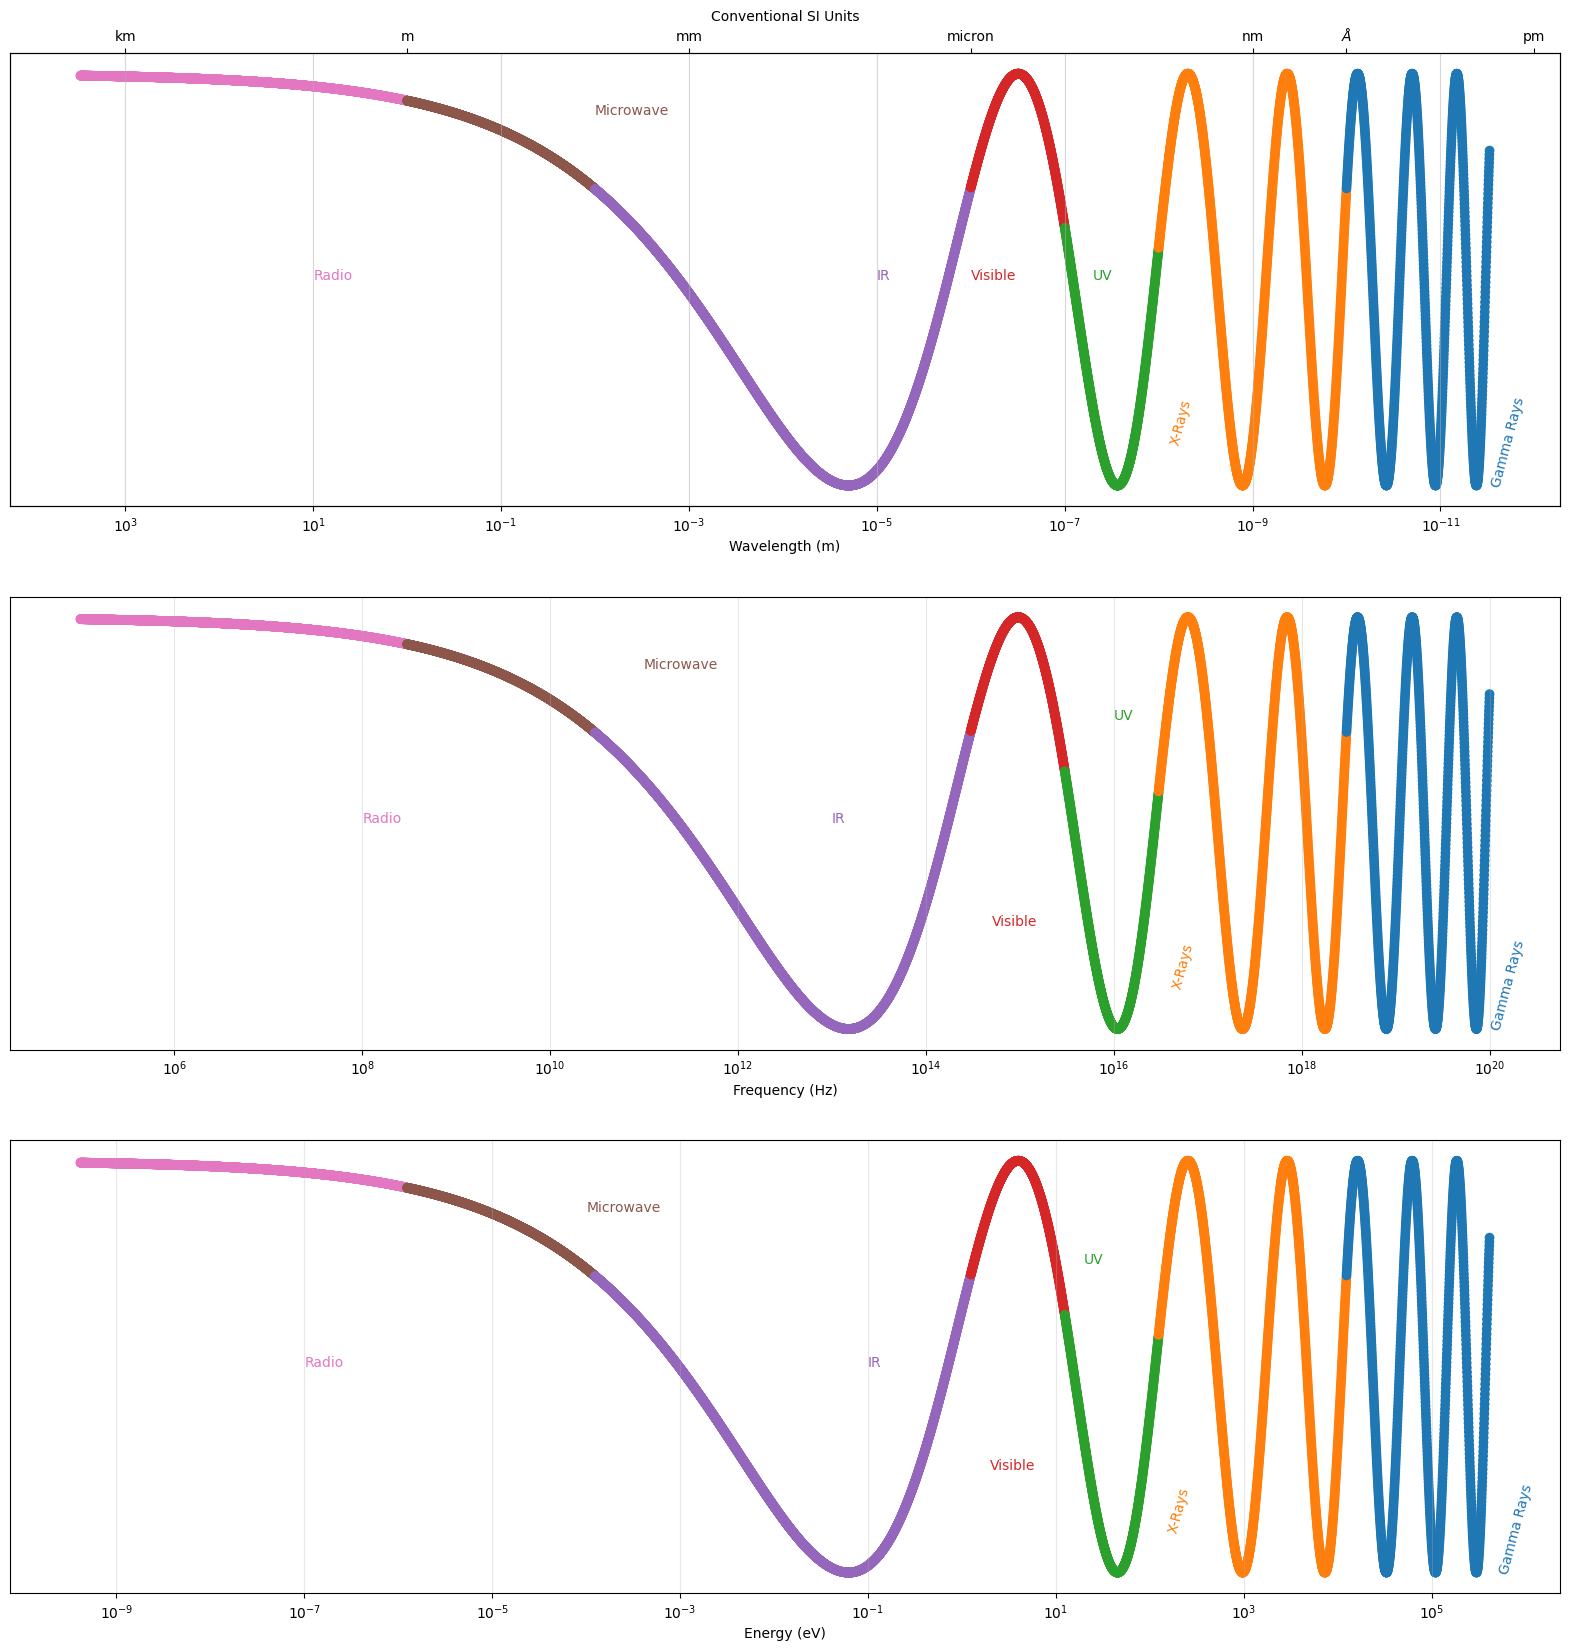

In [5]:
fig,axs=plt.subplots(3, figsize=(20,20))
axs[0].set_xlabel("Wavelength (m)")
axs[0].set_xscale("log")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_xscale("log")
axs[2].set_xlabel("Energy (eV)")
axs[2].set_xscale("log")

axs[0].grid(alpha=0.5, axis="x")
axs[1].grid(alpha=0.3, axis="x")
axs[2].grid(alpha=0.3, axis="x")

axs[0].tick_params(left=False)
axs[0].set(yticklabels=[])
axs[1].tick_params(left=False)
axs[1].set(yticklabels=[])
axs[2].tick_params(left=False)
axs[2].set(yticklabels=[])

# Custom colormap created with the help of chatgpt. I gave the list of colors and the boundaries following the table in the slides for lecture 2
# Define the boundaries and corresponding colors
boundaries = [0, 1e-10, 1e-8, 1e-7, 1e-6, 1e-2, 1e0, 1e10]  # 7 intervals
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']   # 7 colors for the intervals

# Create a ListedColormap using the 'C' colors
cmap = ListedColormap(colors)

# Create a normalizer for the boundaries
norm = BoundaryNorm(boundaries, ncolors=len(colors))

# Generating data
freq=np.logspace(5,20,10000) # Hz
wl = 3e8/freq # m/s
energy = 4.135667696e-15 * freq # h in eV/Hz, energy in eV

y = np.cos(freq**(1/6)/0.5e2) # Amplitude doesnt mean anything, just chose numbers that look okay

# Plotting points
axs[0].scatter(wl,y, c=wl, cmap=cmap, norm=norm)
axs[1].scatter(freq,y, c=wl, cmap=cmap, norm=norm) # c=wl because bounds are defined in units of frequency
axs[2].scatter(energy,y, c=wl, cmap=cmap, norm=norm) # # c=wl because bounds are defined in units of frequency
axs[0].xaxis.set_inverted(True)

# labeling the spectrum
# Wavelength
axs[0].annotate("Radio", [1e1,0],c="C6")
axs[0].annotate("Microwave", [1e-2,0.8],c="C5")
axs[0].annotate("IR", [1e-5,0],c="C4")
axs[0].annotate("Visible", [1e-6,0],c="C3")
axs[0].annotate("UV", [5e-8,0],c="C2")
axs[0].annotate("X-Rays", [8e-9,-0.8],c="C1", rotation=75)
axs[0].annotate("Gamma Rays", [3e-12,-1],c="C0", rotation=75)


# Frequency => Different positions because different units
axs[1].annotate("Radio", [1e8,0],c="C6")
axs[1].annotate("Microwave", [1e11,0.75],c="C5")
axs[1].annotate("IR", [1e13,0],c="C4")
axs[1].annotate("Visible", [5e14,-0.5],c="C3")
axs[1].annotate("UV", [1e16,0.5],c="C2")
axs[1].annotate("X-Rays", [4e16,-0.8],c="C1", rotation=75)
axs[1].annotate("Gamma Rays", [1e20,-1],c="C0", rotation=75)

# Energy => Different positions because different units
axs[2].annotate("Radio", [1e-7,0],c="C6")
axs[2].annotate("Microwave", [1e-4,0.75],c="C5")
axs[2].annotate("IR", [1e-1,0],c="C4")
axs[2].annotate("Visible", [2e0,-0.5],c="C3")
axs[2].annotate("UV", [2e1,0.5],c="C2")
axs[2].annotate("X-Rays", [1.5e2,-0.8],c="C1", rotation=75)
axs[2].annotate("Gamma Rays", [5e5,-1],c="C0", rotation=75)

# Adding units on wavelength
# Adding custom ticks for SI units
tick_positions = [1e3, 1e0, 1e-3, 1e-6, 1e-9, 1e-10, 1e-12]
tick_labels = ["km", "m", "mm", "micron", "nm", r"$\AA$", "pm"]

# Create a secondary x-axis at the top
ax_top = axs[0].twiny()
ax_top.set_xscale("log")
ax_top.xaxis.set_inverted(True)

# Set custom ticks and labels on the secondary x-axis
ax_top.set_xticks(tick_positions)
ax_top.set_xticklabels(tick_labels)

# set the limits of the secondary x-axis so they align
ax_top.set_xlim(axs[0].get_xlim())

# add title to top axis
ax_top.set_xlabel("Conventional SI Units")


# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission.

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy!

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need):
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

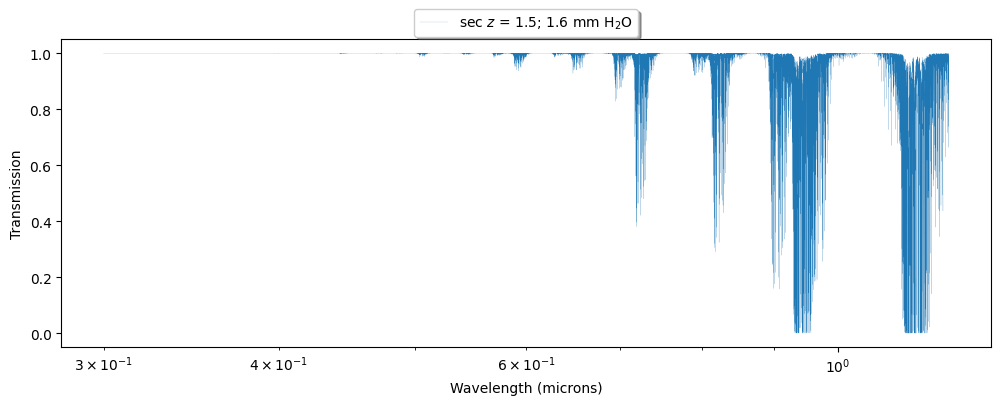

In [6]:
# 2.1: Get the Optical Atmospheric Transmission from https://specreduce.readthedocs.io/en/latest/extinction.html
#import matplotlib.pyplot as plt
from specreduce.calibration_data import AtmosphericExtinction, AtmosphericTransmission, SUPPORTED_EXTINCTION_MODELS

fig, ax = plt.subplots(figsize=(12,4))
ext_default = AtmosphericTransmission()
ext_custom = AtmosphericTransmission(data_file="data/2.3mm_pwv_transmission.txt") # SInce the package has deprecated dependencies, we use the file made available in the course teams channel, thanks to Aadya Agrawal
#ax.plot(ext_default.spectral_axis, ext_default.transmission, label=r"sec $z$ = 1; 1 mm H$_{2}$O", linewidth=1)
ax.plot(ext_custom.spectral_axis, ext_custom.transmission, label=r"sec $z$ = 1.5; 1.6 mm H$_{2}$O", linewidth=0.1)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2, fancybox=True, shadow=True)
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")
ax.set_xscale("log")
fig.show()

Text(0, 0.5, 'Transmission')

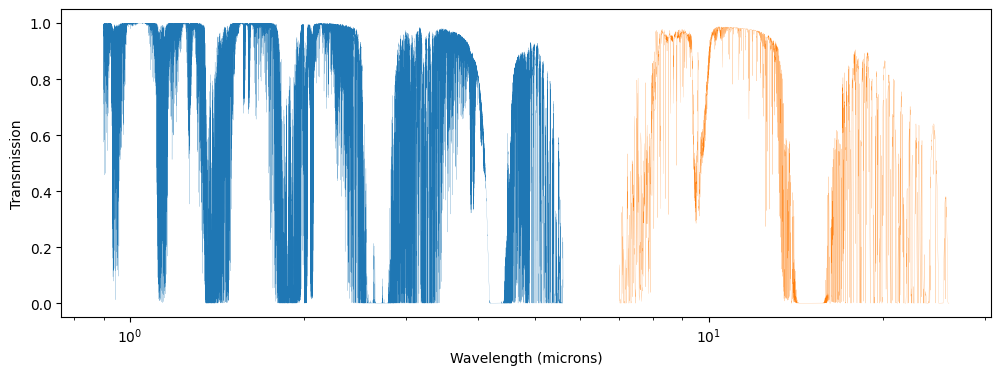

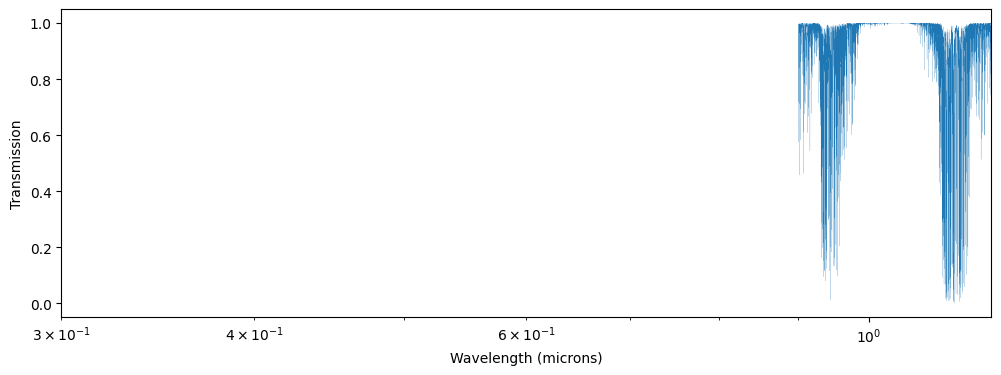

In [7]:
# Get NIR and MIR transmission curves from  http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra (Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)
NIR = pd.read_csv("data/cptrans_zm_23_10.dat", sep="\s+", names=("WL (um)", "Transmission"))
#display(NIR)

MIR = pd.read_csv("data/cptrans_nq_23_10.dat", sep="\s+", names=("WL (um)", "Transmission"))
#display(MIR)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(NIR["WL (um)"], NIR["Transmission"], linewidth=0.1)
ax.plot(MIR["WL (um)"], MIR["Transmission"], linewidth=0.1)
ax.set_xscale("log")
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(NIR["WL (um)"], NIR["Transmission"], linewidth=0.1)
ax.set_xscale("log")
ax.set_xlim([0.3,1.2])
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")

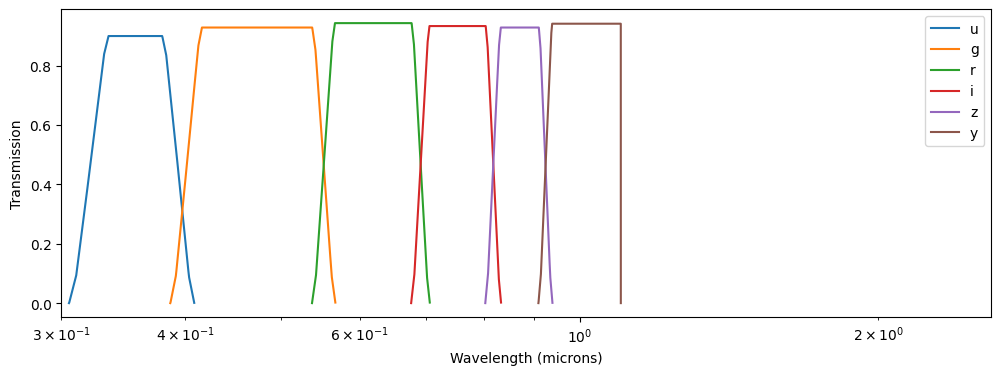

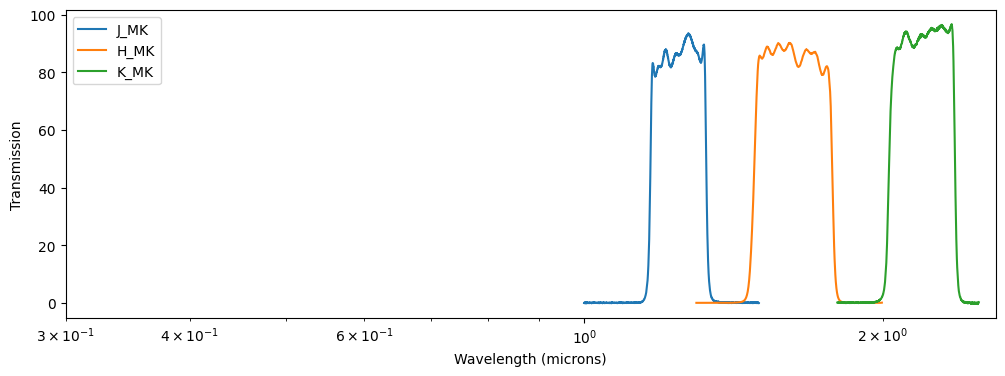

In [8]:
# 2.2: Get the LSST Filter Transmissions (ugrizy, filter only)
LSST_u_filter = pd.read_csv("data/LSST_LSST.u_filter.dat", sep="\s+", names=("WL (A)", "Transmission"))
LSST_g_filter = pd.read_csv("data/LSST_LSST.g_filter.dat", sep="\s+", names=("WL (A)", "Transmission"))
LSST_r_filter = pd.read_csv("data/LSST_LSST.r_filter.dat", sep="\s+", names=("WL (A)", "Transmission"))
LSST_i_filter = pd.read_csv("data/LSST_LSST.i_filter.dat", sep="\s+", names=("WL (A)", "Transmission"))
LSST_z_filter = pd.read_csv("data/LSST_LSST.z_filter.dat", sep="\s+", names=("WL (A)", "Transmission"))
LSST_y_filter = pd.read_csv("data/LSST_LSST.y_filter.dat", sep="\s+", names=("WL (A)", "Transmission"))

# Adding a columns for the wavelength in microns
LSST_u_filter["WL (um)"] = LSST_u_filter["WL (A)"] * 1e-4
LSST_g_filter["WL (um)"] = LSST_g_filter["WL (A)"] * 1e-4
LSST_r_filter["WL (um)"] = LSST_r_filter["WL (A)"] * 1e-4
LSST_i_filter["WL (um)"] = LSST_i_filter["WL (A)"] * 1e-4
LSST_z_filter["WL (um)"] = LSST_z_filter["WL (A)"] * 1e-4
LSST_y_filter["WL (um)"] = LSST_y_filter["WL (A)"] * 1e-4

fig,ax=plt.subplots(figsize=(12,4))
plt.plot(LSST_u_filter["WL (um)"], LSST_u_filter["Transmission"], label="u")
plt.plot(LSST_g_filter["WL (um)"], LSST_g_filter["Transmission"], label="g")
plt.plot(LSST_r_filter["WL (um)"], LSST_r_filter["Transmission"], label="r")
plt.plot(LSST_i_filter["WL (um)"], LSST_i_filter["Transmission"], label="i")
plt.plot(LSST_z_filter["WL (um)"], LSST_z_filter["Transmission"], label="z")
plt.plot(LSST_y_filter["WL (um)"], LSST_y_filter["Transmission"], label="y")
ax.set_xscale("log")
ax.set_xlim([0.3,2.6])
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")
plt.legend()

# and the IRTF ([JHK]_MK, filter only) transmissions

IRTF_JMK = pd.read_csv("data/nsfcam_jmk_trans.dat", sep="\s+", names=("WL (um)", "Transmission"), skiprows=1)
IRTF_HMK = pd.read_csv("data/nsfcam_hmk_trans.dat", sep="\s+", names=("WL (um)", "Transmission"), skiprows=1)
IRTF_KMK = pd.read_csv("data/nsfcam_kmk_trans.dat", sep="\s+", names=("WL (um)", "Transmission"), skiprows=1)

fig,ax=plt.subplots(figsize=(12,4))
plt.plot(IRTF_JMK["WL (um)"], IRTF_JMK["Transmission"], label="J_MK")
plt.plot(IRTF_HMK["WL (um)"], IRTF_HMK["Transmission"], label="H_MK")
plt.plot(IRTF_KMK["WL (um)"], IRTF_KMK["Transmission"], label="K_MK")
ax.set_xscale("log")
ax.set_xlim([0.3,2.6])
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")
plt.legend()

2.5020713227924554
2.5006819


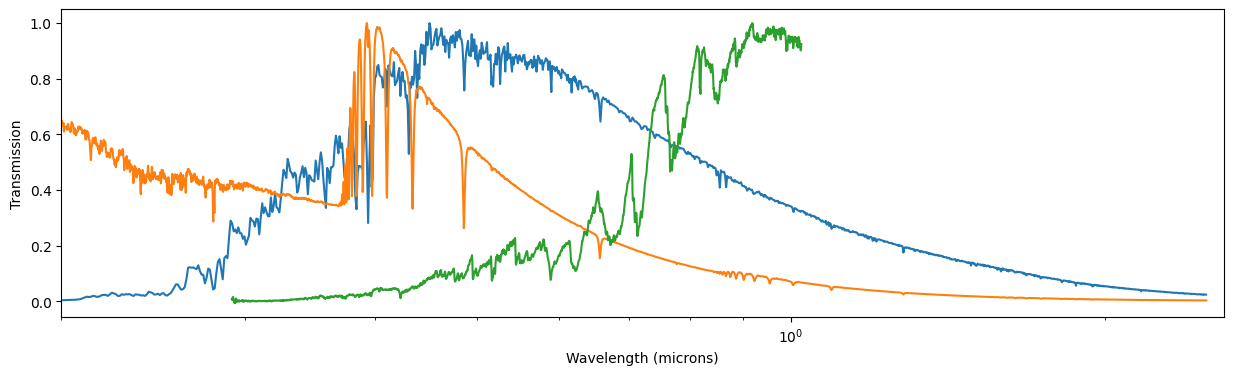

In [9]:
# 2.3: Finally, get the SEDs of three stars from CALSPEC and for the actual data (There is no M5V but there is a M3.5V star - BD-11 3759)
from astropy.io import fits

def get_SED_from_fits(fits_file):
    with fits.open(fits_file) as hdul:
        #display(hdul[1].header)
        df = pd.DataFrame.from_records(hdul[1].data, coerce_float=True)
    return df

Sun_SED = get_SED_from_fits("data/sun_reference_stis_002.fits")
Vega_SED = get_SED_from_fits("data/alpha_lyr_stis_011.fits")
M35V_SED = get_SED_from_fits("data/bd11d3759_stis_003.fits")

# Converting to microns
Sun_SED["WAVELENGTH (um)"] = Sun_SED["WAVELENGTH"] * 1e-4
Vega_SED["WAVELENGTH (um)"] = Vega_SED["WAVELENGTH"] * 1e-4
M35V_SED["WAVELENGTH (um)"] = M35V_SED["WAVELENGTH"] * 1e-4

# Notice that the spectra exist in ranges outside of the filters. So we apply cuts.
print(np.max(Vega_SED["WAVELENGTH (um)"][:4417]))
print(np.max(Sun_SED["WAVELENGTH (um)"][:1447]))

Sun_SED = Sun_SED[:1447]
Vega_SED = Vega_SED[:4417]


# As is done in the original paper, we present the flux in arbitrary units (in this case, normalized to their highest value so that all look good in a single plot)
#display(df)
fig,ax=plt.subplots(figsize=(15,4))
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["FLUX"]/max(Sun_SED["FLUX"]))
ax.plot(Vega_SED["WAVELENGTH (um)"], Vega_SED["FLUX"]/max(Vega_SED["FLUX"]))
ax.plot(M35V_SED["WAVELENGTH (um)"], M35V_SED["FLUX"]/max(M35V_SED["FLUX"]))
ax.set_xlim([0.2,2.6])
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Transmission")
ax.set_xscale("log")

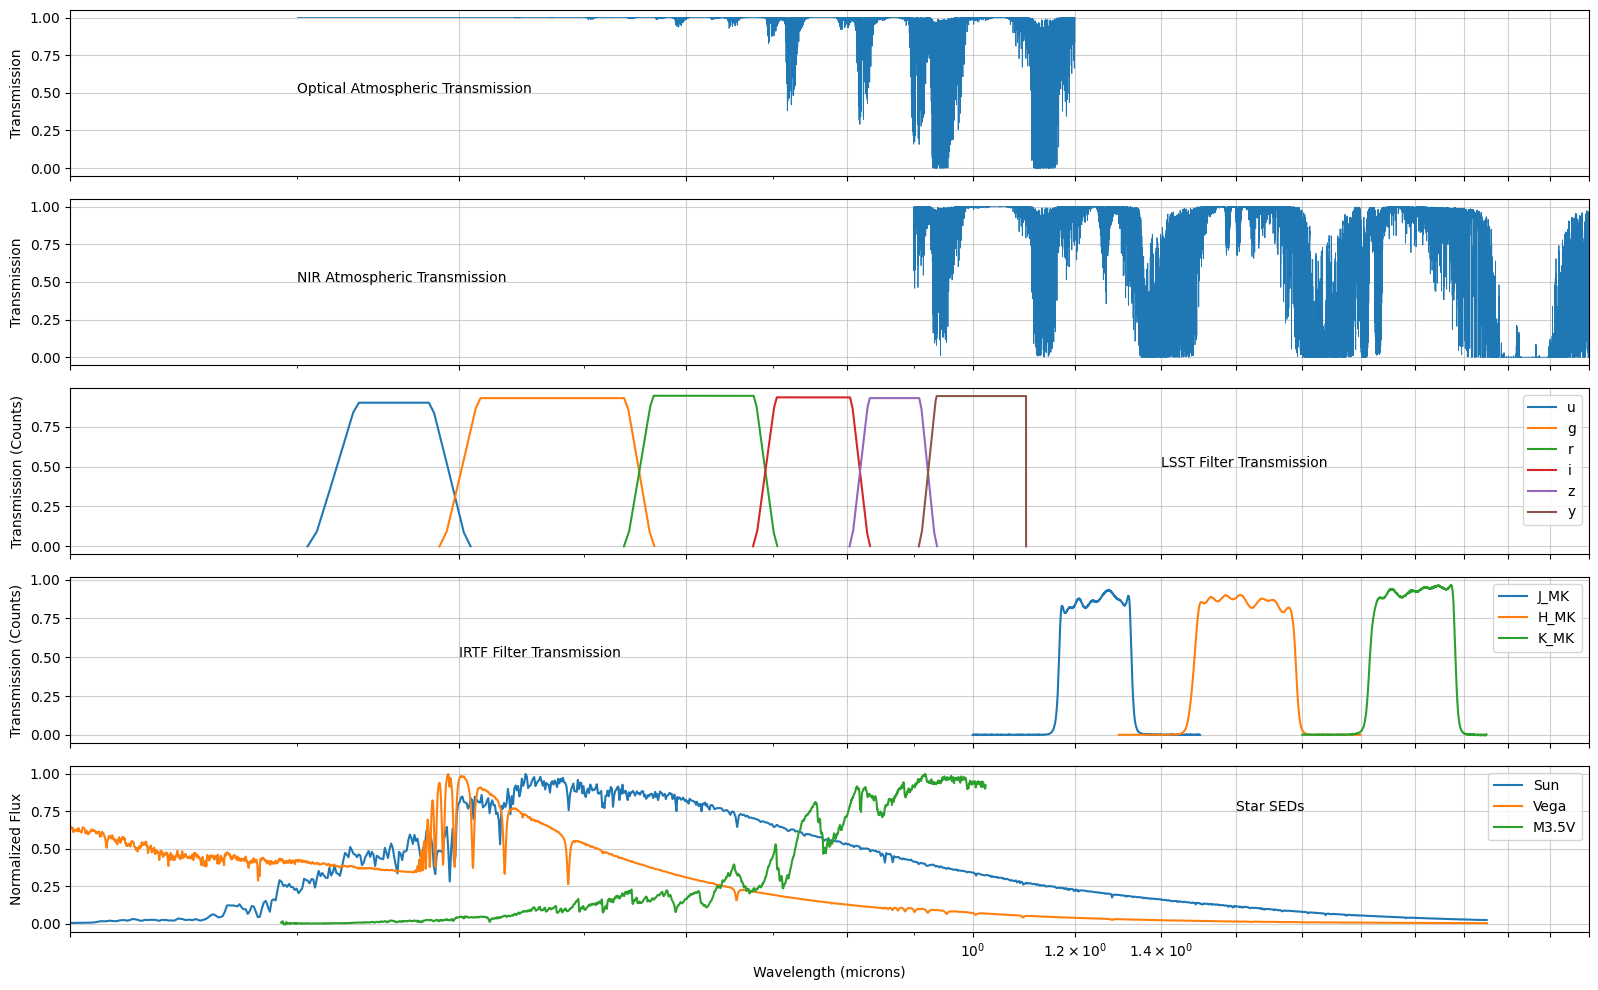

In [10]:
# Finally, reconstruct the full plot
import matplotlib.ticker as ticker
tick_spacing=0.2

# Optical atmospheric
fig, axs = plt.subplots(5, figsize=(16,10), sharex=True)
axs[0].plot(ext_custom.spectral_axis, ext_custom.transmission, label=r"sec $z$ = 1.5; 1.6 mm H$_{2}$O", linewidth=0.6)
axs[0].set_ylabel("Transmission")
axs[0].set_xscale("log")
axs[0].grid(alpha=0.6)
axs[0].annotate("Optical Atmospheric Transmission", [0.3,0.5])
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# NIR Atmospheric
axs[1].plot(NIR["WL (um)"], NIR["Transmission"], linewidth=0.6)
axs[1].set_ylabel("Transmission")
axs[1].grid(alpha=0.6)
axs[1].annotate("NIR Atmospheric Transmission", [0.3,0.5])

# LSST Filters
axs[2].plot(LSST_u_filter["WL (um)"], LSST_u_filter["Transmission"], label="u")
axs[2].plot(LSST_g_filter["WL (um)"], LSST_g_filter["Transmission"], label="g")
axs[2].plot(LSST_r_filter["WL (um)"], LSST_r_filter["Transmission"], label="r")
axs[2].plot(LSST_i_filter["WL (um)"], LSST_i_filter["Transmission"], label="i")
axs[2].plot(LSST_z_filter["WL (um)"], LSST_z_filter["Transmission"], label="z")
axs[2].plot(LSST_y_filter["WL (um)"], LSST_y_filter["Transmission"], label="y")
axs[2].set_ylabel("Transmission (Counts)")
axs[2].legend()
axs[2].grid(alpha=0.6)
axs[2].annotate("LSST Filter Transmission", [1.4,0.5])

# IRTF Filters
axs[3].plot(IRTF_JMK["WL (um)"], IRTF_JMK["Transmission"]/100, label="J_MK")
axs[3].plot(IRTF_HMK["WL (um)"], IRTF_HMK["Transmission"]/100, label="H_MK")
axs[3].plot(IRTF_KMK["WL (um)"], IRTF_KMK["Transmission"]/100, label="K_MK")
axs[3].set_ylabel("Transmission (Counts)")
axs[3].legend()
axs[3].grid(alpha=0.6)
axs[3].annotate("IRTF Filter Transmission", [0.4,0.5])

# SEDs
axs[4].plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["FLUX"]/max(Sun_SED["FLUX"]), label="Sun")
axs[4].plot(Vega_SED["WAVELENGTH (um)"], Vega_SED["FLUX"]/max(Vega_SED["FLUX"]), label="Vega")
axs[4].plot(M35V_SED["WAVELENGTH (um)"], M35V_SED["FLUX"]/max(M35V_SED["FLUX"]), label="M3.5V")
axs[4].set_xlim([0.2,3])
axs[4].legend()
axs[4].set_ylabel("Normalized Flux")
axs[4].grid(alpha=0.6)
axs[4].set_xlabel("Wavelength (microns)")
axs[4].annotate("Star SEDs", [1.6,0.75])


plt.tight_layout()
#fig.show()

# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK)
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

In [11]:
# Step 1 is to interpolate
# We want to have filter (LSST and IRTF) and atmospheric (optical and NIR) transmissions calculated at every wavelength of the SEDs
# We can use numpy to do that

'------------------------------------- Sun -------------------------------------'
# Optical Atmospheric Transmission (first we write the data in a dataframe)
optical_atmo = pd.DataFrame(data={"WAVELENGTH (um)":ext_custom.spectral_axis, "Transmission":ext_custom.transmission})

Sun_SED["Optical_Atmo_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], optical_atmo["WAVELENGTH (um)"], optical_atmo["Transmission"])

# NIR Atmospheric Transmission
Sun_SED["NIR_Atmo_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], NIR["WL (um)"], NIR["Transmission"])

# LSST filters
Sun_SED["LSST_u_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], LSST_u_filter["WL (um)"], LSST_u_filter["Transmission"])
Sun_SED["LSST_g_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], LSST_g_filter["WL (um)"], LSST_g_filter["Transmission"])
Sun_SED["LSST_r_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], LSST_r_filter["WL (um)"], LSST_r_filter["Transmission"])
Sun_SED["LSST_i_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], LSST_i_filter["WL (um)"], LSST_i_filter["Transmission"])
Sun_SED["LSST_z_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], LSST_z_filter["WL (um)"], LSST_z_filter["Transmission"])
Sun_SED["LSST_y_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], LSST_y_filter["WL (um)"], LSST_y_filter["Transmission"])


# IRTF filters (we first add transmission in proper units and then sort so that the wavelength is increasing)
IRTF_JMK["Transmission_perc"] = IRTF_JMK["Transmission"]/100
IRTF_JMK.sort_values(by=["WL (um)"], inplace=True)
IRTF_HMK["Transmission_perc"] = IRTF_HMK["Transmission"]/100
IRTF_HMK.sort_values(by=["WL (um)"], inplace=True)
IRTF_KMK["Transmission_perc"] = IRTF_KMK["Transmission"]/100
IRTF_KMK.sort_values(by=["WL (um)"], inplace=True)


Sun_SED["IRTF_JMK_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], IRTF_JMK["WL (um)"], IRTF_JMK["Transmission_perc"])
Sun_SED["IRTF_HMK_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], IRTF_HMK["WL (um)"], IRTF_HMK["Transmission_perc"])
Sun_SED["IRTF_KMK_Transmission"] = np.interp(Sun_SED["WAVELENGTH (um)"], IRTF_KMK["WL (um)"], IRTF_KMK["Transmission_perc"])

#display(Sun_SED)

'------------------------------------- Vega -------------------------------------'
# Optical Atmospheric Transmission

Vega_SED["Optical_Atmo_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], optical_atmo["WAVELENGTH (um)"], optical_atmo["Transmission"])

# NIR Atmospheric Transmission
Vega_SED["NIR_Atmo_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], NIR["WL (um)"], NIR["Transmission"])

# LSST filters
Vega_SED["LSST_u_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], LSST_u_filter["WL (um)"], LSST_u_filter["Transmission"])
Vega_SED["LSST_g_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], LSST_g_filter["WL (um)"], LSST_g_filter["Transmission"])
Vega_SED["LSST_r_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], LSST_r_filter["WL (um)"], LSST_r_filter["Transmission"])
Vega_SED["LSST_i_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], LSST_i_filter["WL (um)"], LSST_i_filter["Transmission"])
Vega_SED["LSST_z_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], LSST_z_filter["WL (um)"], LSST_z_filter["Transmission"])
Vega_SED["LSST_y_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], LSST_y_filter["WL (um)"], LSST_y_filter["Transmission"])

Vega_SED["IRTF_JMK_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], IRTF_JMK["WL (um)"], IRTF_JMK["Transmission_perc"])
Vega_SED["IRTF_HMK_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], IRTF_HMK["WL (um)"], IRTF_HMK["Transmission_perc"])
Vega_SED["IRTF_KMK_Transmission"] = np.interp(Vega_SED["WAVELENGTH (um)"], IRTF_KMK["WL (um)"], IRTF_KMK["Transmission_perc"])

#display(Vega_SED)

'------------------------------------- M3.5V -------------------------------------'
# Optical Atmospheric Transmission (first we write the data in a dataframe)


M35V_SED["Optical_Atmo_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], optical_atmo["WAVELENGTH (um)"], optical_atmo["Transmission"])

# NIR Atmospheric Transmission
M35V_SED["NIR_Atmo_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], NIR["WL (um)"], NIR["Transmission"])

# LSST filters
M35V_SED["LSST_u_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], LSST_u_filter["WL (um)"], LSST_u_filter["Transmission"])
M35V_SED["LSST_g_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], LSST_g_filter["WL (um)"], LSST_g_filter["Transmission"])
M35V_SED["LSST_r_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], LSST_r_filter["WL (um)"], LSST_r_filter["Transmission"])
M35V_SED["LSST_i_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], LSST_i_filter["WL (um)"], LSST_i_filter["Transmission"])
M35V_SED["LSST_z_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], LSST_z_filter["WL (um)"], LSST_z_filter["Transmission"])
M35V_SED["LSST_y_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], LSST_y_filter["WL (um)"], LSST_y_filter["Transmission"])

M35V_SED["IRTF_JMK_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], IRTF_JMK["WL (um)"], IRTF_JMK["Transmission_perc"])
M35V_SED["IRTF_HMK_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], IRTF_HMK["WL (um)"], IRTF_HMK["Transmission_perc"])
M35V_SED["IRTF_KMK_Transmission"] = np.interp(M35V_SED["WAVELENGTH (um)"], IRTF_KMK["WL (um)"], IRTF_KMK["Transmission_perc"])

#display(M35V_SED)

In [12]:
# Now we build the response functions in each filter

'------------------------------------- Sun -------------------------------------'
Sun_SED["Response_LSST_u"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["LSST_u_Transmission"]
Sun_SED["Response_LSST_g"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["LSST_g_Transmission"]
Sun_SED["Response_LSST_r"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["LSST_r_Transmission"]
Sun_SED["Response_LSST_i"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["LSST_i_Transmission"]
Sun_SED["Response_LSST_z"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["LSST_z_Transmission"]
Sun_SED["Response_LSST_y"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["LSST_y_Transmission"]

Sun_SED["Response_IRTF_JMK"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["IRTF_JMK_Transmission"]
Sun_SED["Response_IRTF_HMK"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["IRTF_HMK_Transmission"]
Sun_SED["Response_IRTF_KMK"] = Sun_SED["Optical_Atmo_Transmission"] * Sun_SED["NIR_Atmo_Transmission"] * Sun_SED["IRTF_KMK_Transmission"]

'------------------------------------ Vega ------------------------------------'
Vega_SED["Response_LSST_u"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["LSST_u_Transmission"]
Vega_SED["Response_LSST_g"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["LSST_g_Transmission"]
Vega_SED["Response_LSST_r"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["LSST_r_Transmission"]
Vega_SED["Response_LSST_i"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["LSST_i_Transmission"]
Vega_SED["Response_LSST_z"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["LSST_z_Transmission"]
Vega_SED["Response_LSST_y"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["LSST_y_Transmission"]

Vega_SED["Response_IRTF_JMK"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["IRTF_JMK_Transmission"]
Vega_SED["Response_IRTF_HMK"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["IRTF_HMK_Transmission"]
Vega_SED["Response_IRTF_KMK"] = Vega_SED["Optical_Atmo_Transmission"] * Vega_SED["NIR_Atmo_Transmission"] * Vega_SED["IRTF_KMK_Transmission"]

'------------------------------------ M3.5V -----------------------------------'
M35V_SED["Response_LSST_u"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["LSST_u_Transmission"]
M35V_SED["Response_LSST_g"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["LSST_g_Transmission"]
M35V_SED["Response_LSST_r"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["LSST_r_Transmission"]
M35V_SED["Response_LSST_i"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["LSST_i_Transmission"]
M35V_SED["Response_LSST_z"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["LSST_z_Transmission"]
M35V_SED["Response_LSST_y"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["LSST_y_Transmission"]

M35V_SED["Response_IRTF_JMK"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["IRTF_JMK_Transmission"]
M35V_SED["Response_IRTF_HMK"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["IRTF_HMK_Transmission"]
M35V_SED["Response_IRTF_KMK"] = M35V_SED["Optical_Atmo_Transmission"] * M35V_SED["NIR_Atmo_Transmission"] * M35V_SED["IRTF_KMK_Transmission"]


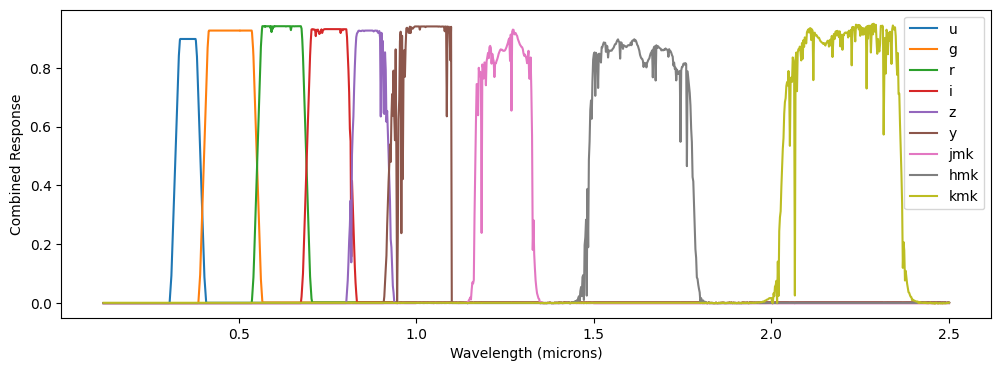

In [13]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_LSST_u"], label="u")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_LSST_g"], label="g")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_LSST_r"], label="r")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_LSST_i"], label="i")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_LSST_z"], label="z")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_LSST_y"], label="y")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_IRTF_JMK"], label="jmk")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_IRTF_HMK"], label="hmk")
ax.plot(Sun_SED["WAVELENGTH (um)"], Sun_SED["Response_IRTF_KMK"], label="kmk")
ax.set_xlabel("Wavelength (microns)")
ax.set_ylabel("Combined Response")
ax.legend()

In [14]:
# We integrate flux density with the spectrum to find Flux.
flux_Sun_u = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_LSST_u"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_LSST_u"], x=Sun_SED["WAVELENGTH (um)"])
flux_Sun_g = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_LSST_g"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_LSST_g"], x=Sun_SED["WAVELENGTH (um)"])
flux_Sun_r = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_LSST_r"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_LSST_r"], x=Sun_SED["WAVELENGTH (um)"])
flux_Sun_i = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_LSST_i"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_LSST_i"], x=Sun_SED["WAVELENGTH (um)"])
flux_Sun_z = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_LSST_z"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_LSST_z"], x=Sun_SED["WAVELENGTH (um)"])
flux_Sun_y = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_LSST_y"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_LSST_y"], x=Sun_SED["WAVELENGTH (um)"])

flux_Sun_jmk = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_IRTF_JMK"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_IRTF_JMK"], x=Sun_SED["WAVELENGTH (um)"])
flux_Sun_hmk = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_IRTF_HMK"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_IRTF_HMK"], x=Sun_SED["WAVELENGTH (um)"])
flux_Sun_kmk = sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["FLUX"] * Sun_SED["Response_IRTF_KMK"], x=Sun_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Sun_SED["WAVELENGTH (um)"] * Sun_SED["Response_IRTF_KMK"], x=Sun_SED["WAVELENGTH (um)"])

In [15]:
# We integrate flux density with the spectrum to find Flux.
flux_Vega_u = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_LSST_u"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_LSST_u"], x=Vega_SED["WAVELENGTH (um)"])
flux_Vega_g = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_LSST_g"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_LSST_g"], x=Vega_SED["WAVELENGTH (um)"])
flux_Vega_r = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_LSST_r"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_LSST_r"], x=Vega_SED["WAVELENGTH (um)"])
flux_Vega_i = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_LSST_i"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_LSST_i"], x=Vega_SED["WAVELENGTH (um)"])
flux_Vega_z = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_LSST_z"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_LSST_z"], x=Vega_SED["WAVELENGTH (um)"])
flux_Vega_y = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_LSST_y"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_LSST_y"], x=Vega_SED["WAVELENGTH (um)"])

flux_Vega_jmk = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_IRTF_JMK"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_IRTF_JMK"], x=Vega_SED["WAVELENGTH (um)"])
flux_Vega_hmk = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_IRTF_HMK"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_IRTF_HMK"], x=Vega_SED["WAVELENGTH (um)"])
flux_Vega_kmk = sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["FLUX"] * Vega_SED["Response_IRTF_KMK"], x=Vega_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=Vega_SED["WAVELENGTH (um)"] * Vega_SED["Response_IRTF_KMK"], x=Vega_SED["WAVELENGTH (um)"])

In [16]:
# We integrate flux density with the spectrum to find Flux.
flux_M35V_u = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_LSST_u"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_LSST_u"], x=M35V_SED["WAVELENGTH (um)"])
flux_M35V_g = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_LSST_g"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_LSST_g"], x=M35V_SED["WAVELENGTH (um)"])
flux_M35V_r = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_LSST_r"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_LSST_r"], x=M35V_SED["WAVELENGTH (um)"])
flux_M35V_i = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_LSST_i"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_LSST_i"], x=M35V_SED["WAVELENGTH (um)"])
flux_M35V_z = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_LSST_z"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_LSST_z"], x=M35V_SED["WAVELENGTH (um)"])
flux_M35V_y = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_LSST_y"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_LSST_y"], x=M35V_SED["WAVELENGTH (um)"])

flux_M35V_jmk = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_IRTF_JMK"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_IRTF_JMK"], x=M35V_SED["WAVELENGTH (um)"])
flux_M35V_hmk = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_IRTF_HMK"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_IRTF_HMK"], x=M35V_SED["WAVELENGTH (um)"])
flux_M35V_kmk = sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["FLUX"] * M35V_SED["Response_IRTF_KMK"], x=M35V_SED["WAVELENGTH (um)"]) / sp.integrate.simpson(y=M35V_SED["WAVELENGTH (um)"] * M35V_SED["Response_IRTF_KMK"], x=M35V_SED["WAVELENGTH (um)"])

In [17]:
# Then, we calculate vega magnitudes
def relative_magnitude(F1, F2):
    # Calculates magnitude based on relative flux
    # if F2 is the flux of vega in this filter, we get the magnitude in the vega system
    return -2.5*np.log10(F1/F2)

VegaMag_Sun_u = relative_magnitude(flux_Sun_u,flux_Vega_u)
VegaMag_Sun_g = relative_magnitude(flux_Sun_g,flux_Vega_g)
VegaMag_Sun_r = relative_magnitude(flux_Sun_r,flux_Vega_r)
VegaMag_Sun_i = relative_magnitude(flux_Sun_i,flux_Vega_i)
VegaMag_Sun_z = relative_magnitude(flux_Sun_z,flux_Vega_z)
VegaMag_Sun_y = relative_magnitude(flux_Sun_y,flux_Vega_y)

VegaMag_Sun_jmk = relative_magnitude(flux_Sun_jmk,flux_Vega_jmk)
VegaMag_Sun_hmk = relative_magnitude(flux_Sun_hmk,flux_Vega_hmk)
VegaMag_Sun_kmk = relative_magnitude(flux_Sun_kmk,flux_Vega_kmk)

VegaMag_Vega_u = relative_magnitude(flux_Vega_u,flux_Vega_u)
VegaMag_Vega_g = relative_magnitude(flux_Vega_g,flux_Vega_g)
VegaMag_Vega_r = relative_magnitude(flux_Vega_r,flux_Vega_r)
VegaMag_Vega_i = relative_magnitude(flux_Vega_i,flux_Vega_i)
VegaMag_Vega_z = relative_magnitude(flux_Vega_z,flux_Vega_z)
VegaMag_Vega_y = relative_magnitude(flux_Vega_y,flux_Vega_y)

VegaMag_Vega_jmk = relative_magnitude(flux_Vega_jmk,flux_Vega_jmk)
VegaMag_Vega_hmk = relative_magnitude(flux_Vega_hmk,flux_Vega_hmk)
VegaMag_Vega_kmk = relative_magnitude(flux_Vega_kmk,flux_Vega_kmk)

VegaMag_M35V_u = relative_magnitude(flux_M35V_u,flux_Vega_u)
VegaMag_M35V_g = relative_magnitude(flux_M35V_g,flux_Vega_g)
VegaMag_M35V_r = relative_magnitude(flux_M35V_r,flux_Vega_r)
VegaMag_M35V_i = relative_magnitude(flux_M35V_i,flux_Vega_i)
VegaMag_M35V_z = relative_magnitude(flux_M35V_z,flux_Vega_z)
VegaMag_M35V_y = relative_magnitude(flux_M35V_y,flux_Vega_y)

VegaMag_M35V_jmk = relative_magnitude(flux_M35V_jmk,flux_Vega_jmk)
VegaMag_M35V_hmk = relative_magnitude(flux_M35V_hmk,flux_Vega_hmk)
VegaMag_M35V_kmk = relative_magnitude(flux_M35V_kmk,flux_Vega_kmk)

In [18]:
# We then convert to AB magnitudes
# Conversions: https://iopscience.iop.org/article/10.3847/1538-4365/aabfdf#apjsaabfdft3

delta_u = 6.27-5.65 # AB - vega
delta_g = 5.06-5.17 # AB - vega
delta_r = 4.64-4.52 # AB - vega
delta_i = 4.52-4.18 # AB - vega
delta_z = 4.51-4.02 # AB - vega
delta_y = 4.50-3.98 # AB - vega

# we don't have the specific flux for IRTF, but we use Bessel as the standard for JHKLM photometry
# https://iopscience.iop.org/article/10.1086/132281
# Also, the deltas for other filters J, K and L listed in the first link are either the same or very similar (differences are probably smaller than the precision of the interpolations and integrations)
delta_jmk = 4.54-3.67 # AB - vega
delta_hmk = 4.66-3.32 # AB - vega
delta_kmk = 5.09-3.27 # AB - vega



AB_Sun_u = VegaMag_Sun_u + delta_u
AB_Sun_g = VegaMag_Sun_g + delta_g
AB_Sun_r = VegaMag_Sun_r + delta_r
AB_Sun_i = VegaMag_Sun_i + delta_i
AB_Sun_z = VegaMag_Sun_z + delta_z
AB_Sun_y = VegaMag_Sun_y + delta_y

AB_Sun_jmk = VegaMag_Sun_jmk + delta_jmk
AB_Sun_hmk = VegaMag_Sun_hmk + delta_hmk
AB_Sun_kmk = VegaMag_Sun_kmk + delta_kmk

AB_Vega_u = VegaMag_Vega_u + delta_u
AB_Vega_g = VegaMag_Vega_g + delta_g
AB_Vega_r = VegaMag_Vega_r + delta_r
AB_Vega_i = VegaMag_Vega_i + delta_i
AB_Vega_z = VegaMag_Vega_z + delta_z
AB_Vega_y = VegaMag_Vega_y + delta_y

AB_Vega_jmk = VegaMag_Vega_jmk + delta_jmk
AB_Vega_hmk = VegaMag_Vega_hmk + delta_hmk
AB_Vega_kmk = VegaMag_Vega_kmk + delta_kmk

AB_M35V_u = VegaMag_M35V_u + delta_u
AB_M35V_g = VegaMag_M35V_g + delta_g
AB_M35V_r = VegaMag_M35V_r + delta_r
AB_M35V_i = VegaMag_M35V_i + delta_i
AB_M35V_z = VegaMag_M35V_z + delta_z
AB_M35V_y = VegaMag_M35V_y + delta_y

AB_M35V_jmk = VegaMag_M35V_jmk + delta_jmk
AB_M35V_hmk = VegaMag_M35V_hmk + delta_hmk
AB_M35V_kmk = VegaMag_M35V_kmk + delta_kmk

In [19]:
# Finally, to display data

df_data = {"LSST u":[VegaMag_Sun_u, AB_Sun_u, VegaMag_Vega_u, AB_Vega_u, VegaMag_M35V_u, AB_M35V_u],
           "LSST_g":[VegaMag_Sun_g, AB_Sun_g, VegaMag_Vega_g, AB_Vega_g, VegaMag_M35V_g, AB_M35V_g],
           "LSST r":[VegaMag_Sun_r, AB_Sun_r, VegaMag_Vega_r, AB_Vega_r, VegaMag_M35V_r, AB_M35V_r],
           "LSST_i":[VegaMag_Sun_i, AB_Sun_i, VegaMag_Vega_i, AB_Vega_i, VegaMag_M35V_i, AB_M35V_i],
           "LSST z":[VegaMag_Sun_z, AB_Sun_z, VegaMag_Vega_z, AB_Vega_z, VegaMag_M35V_z, AB_M35V_z],
           "LSST_y":[VegaMag_Sun_y, AB_Sun_y, VegaMag_Vega_y, AB_Vega_y, VegaMag_M35V_y, AB_M35V_y],
           "IRTF_JMK":[VegaMag_Sun_jmk, AB_Sun_jmk, VegaMag_Vega_jmk, AB_Vega_jmk, VegaMag_M35V_jmk, AB_M35V_jmk],
           "IRTF_HMK":[VegaMag_Sun_hmk, AB_Sun_hmk, VegaMag_Vega_hmk, AB_Vega_hmk, VegaMag_M35V_hmk, AB_M35V_hmk],
           "IRTF_KMK":[VegaMag_Sun_kmk, AB_Sun_kmk, VegaMag_Vega_kmk, AB_Vega_kmk, VegaMag_M35V_kmk, AB_M35V_kmk],
           }
Index = ["Sun (Vega)","Sun (Ab)","Vega (Vega)","Vega (AB)","M3.5V (Vega)","M3.5V (AB)"]

magnitudes = pd.DataFrame(data=df_data, index=Index)
display(magnitudes)

,LSST u,LSST_g,LSST r,LSST_i,LSST z,LSST_y,IRTF_JMK,IRTF_HMK,IRTF_KMK
Sun (Vega),-26.037492,-26.369100,-27.082236,-27.418155,-27.573014,-27.667812,-27.954411,-28.247509,-28.264426
Sun (Ab),-25.417492,-26.479100,-26.962236,-27.078155,-27.083014,-27.147812,-27.084411,-26.907509,-26.444426
Vega (Vega),-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
Vega (AB),0.620000,-0.110000,0.120000,0.340000,0.490000,0.520000,0.870000,1.340000,1.820000
M3.5V (Vega),13.437974,12.060238,10.489072,8.768553,7.931585,7.419727,7.340875,6.290488,5.164244
M3.5V (AB),14.057974,11.950238,10.609072,9.108553,8.421585,7.939727,8.210875,7.630488,6.984244


### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series.

# Due Sep 17 at Noon!